<a href="https://colab.research.google.com/github/devingoldstein/QM2/blob/main/germandemandfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import files
uploaded = files.upload()

save_directory = "/content/finaldata"

# Create the directory if it doesn't exist
!mkdir -p $save_directory

# Iterate through the uploaded files
for filename, content in uploaded.items():
    # Specify the full file path
    file_path = f"{save_directory}/{filename}"

    # Write the file content to the specified path
    with open(file_path, "wb") as f:
        f.write(content)

    print(f"File '{filename}' saved to '{file_path}'")

Saving germanddemand2.csv to germanddemand2.csv
File 'germanddemand2.csv' saved to '/content/finaldata/germanddemand2.csv'


In [28]:
import pandas

import matplotlib
%matplotlib inline

data = pandas.read_csv('/content/finaldata/germanddemand2.csv')
data.head()

,Country,Managers,Professionals,Technicians,Clerical,Service,Agriculture,Craft,Plant,Elementary,National Average
0,Belgium,11.336,8.843,9.708,5.911,5.651,4.823,3.480,5.889,2.738,7.403
1,Bulgaria,9.112,6.508,6.835,6.894,1.873,0.746,2.603,8.995,3.483,5.671
2,Croatia,0.427,49.672,0.433,0.258,3.983,0.264,0.058,0.090,0.106,15.175
3,Cyprus,0.401,1.148,0.632,0.493,0.938,15.789,2.130,1.131,1.671,0.884
4,Czech Republic,5.516,6.292,4.138,5.570,1.650,0.000,1.337,6.851,1.227,4.222


In [29]:
#cleaning the data

import pandas as pd
import numpy as np

df = pd.read_csv('/content/finaldata/germanddemand2.csv')

clean = df.replace(',', '', regex=True)
clean.iloc[:, 1:] = clean.iloc[:, 1:].replace('-', np.nan, regex=True).astype(float)

clean.head()

,Country,Managers,Professionals,Technicians,Clerical,Service,Agriculture,Craft,Plant,Elementary,National Average
0,Belgium,11.336,8.843,9.708,5.911,5.651,4.823,3.480,5.889,2.738,7.403
1,Bulgaria,9.112,6.508,6.835,6.894,1.873,0.746,2.603,8.995,3.483,5.671
2,Croatia,0.427,49.672,0.433,0.258,3.983,0.264,0.058,0.090,0.106,15.175
3,Cyprus,0.401,1.148,0.632,0.493,0.938,15.789,2.130,1.131,1.671,0.884
4,Czech Republic,5.516,6.292,4.138,5.570,1.650,0.000,1.337,6.851,1.227,4.222


In [ ]:
!pip install geopandas matplotlib plotly
import geopandas as gpd
import plotly.express as px

# Load GeoJSON data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = world[world['continent'] == 'Europe']

# Merge with your dataset
merged_data = europe.merge(clean, left_on='name', right_on='Country')

# Create an interactive choropleth map
fig = px.choropleth(merged_data,
                    locations='iso_a3',
                    color='Managers',  # Replace with  desired column
                    hover_name='name',
                    color_continuous_scale='tealrose',
                    projection='natural earth')

# Customize the map layout
fig.update_geos(lataxis_range=[30, 80], lonaxis_range=[-20, 45])
fig.update_layout(title='Percentage of Managerial Roles Demanding German Speakers', coloraxis_colorbar=dict(title='Managers'))

# Show the interactive map
fig.show()

<ipython-input-4-01fdf7a0aba6>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [ ]:
fig = px.choropleth(merged_data,
                    locations='iso_a3',
                    color='Professionals',  # Replace with  desired column
                    hover_name='name',
                    color_continuous_scale='earth',
                    projection='natural earth')

# Customize the map layout
fig.update_geos(lataxis_range=[30, 80], lonaxis_range=[-20, 45])
fig.update_layout(title='Percentage of Professional Roles Demanding German Speakers', coloraxis_colorbar=dict(title='Professionals}'))

# Show the interactive map
fig.show()

In [ ]:
fig = px.choropleth(merged_data,
                    locations='iso_a3',
                    color='Technicians ',  # Replace with  desired column
                    hover_name='name',
                    color_continuous_scale='oxy',
                    projection='natural earth')

# Customize the map layout
fig.update_geos(lataxis_range=[30, 80], lonaxis_range=[-20, 45])
fig.update_layout(title='Percentage of Technician Roles Demanding German Speakers', coloraxis_colorbar=dict(title='Technicians'))

# Show the interactive map
fig.show()

In [ ]:
fig = px.choropleth(merged_data,
                    locations='iso_a3',
                    color='Clerical',  # Replace with  desired column
                    hover_name='name',
                    color_continuous_scale='picnic',
                    projection='natural earth')

# Customize the map layout
fig.update_geos(lataxis_range=[30, 80], lonaxis_range=[-20, 45])
fig.update_layout(title='Percentage of Clerical Roles Demanding German Speakers', coloraxis_colorbar=dict(title='Clerical'))

# Show the interactive map
fig.show()

In [ ]:
fig = px.choropleth(merged_data,
                    locations='iso_a3',
                    color='Service',  # Replace with  desired column
                    hover_name='name',
                    color_continuous_scale='speed',
                    projection='natural earth')

# Customize the map layout
fig.update_geos(lataxis_range=[30, 80], lonaxis_range=[-20, 45])
fig.update_layout(title='Percentage of Service Roles Demanding German Speakers', coloraxis_colorbar=dict(title='Service'))

# Show the interactive map
fig.show()

In [ ]:
fig = px.choropleth(merged_data,
                    locations='iso_a3',
                    color='Agriculture ',  # Replace with  desired column
                    hover_name='name',
                    color_continuous_scale='sunsetdark',
                    projection='natural earth')

# Customize the map layout
fig.update_geos(lataxis_range=[30, 80], lonaxis_range=[-20, 45])
fig.update_layout(title='Percentage of Agriculture Roles Demanding German Speakers', coloraxis_colorbar=dict(title='Agriculture'))

# Show the interactive map
fig.show()

In [ ]:
fig = px.choropleth(merged_data,
                    locations='iso_a3',
                    color='Craft',  # Replace with  desired column
                    hover_name='name',
                    color_continuous_scale='twilight',
                    projection='natural earth')

# Customize the map layout
fig.update_geos(lataxis_range=[30, 80], lonaxis_range=[-20, 45])
fig.update_layout(title='Percentage of Craft Roles Demanding German Speakers', coloraxis_colorbar=dict(title='Craft'))

# Show the interactive map
fig.show()

In [ ]:
fig = px.choropleth(merged_data,
                    locations='iso_a3',
                    color='Plant',  # Replace with  desired column
                    hover_name='name',
                    color_continuous_scale='plotly3',
                    projection='natural earth')

# Customize the map layout
fig.update_geos(lataxis_range=[30, 80], lonaxis_range=[-20, 45])
fig.update_layout(title='Percentage of Plant Roles Demanding German Speakers', coloraxis_colorbar=dict(title='Plant'))

# Show the interactive map
fig.show()

In [ ]:
fig = px.choropleth(merged_data,
                    locations='iso_a3',
                    color='National Average ',  # Replace with  desired column
                    hover_name='name',
                    hover_data={'National Average ':True,'Managers':True,'Professionals':True,'Technicians ':True,'Clerical':True,'Service':True,'Agriculture ':True,'Craft':True,'Plant':True,'Elementary':True},
                    color_continuous_scale='purpor',
                    projection='natural earth')

# Customize the map layout
fig.update_geos(lataxis_range=[30, 80], lonaxis_range=[-20, 45])
fig.update_layout(title='Average Percentage of Jobs Demanding German Speakers', coloraxis_colorbar=dict(title='National Average'))

# Show the interactive map
fig.show()
fig.write_json('interactive_germandemand.json')

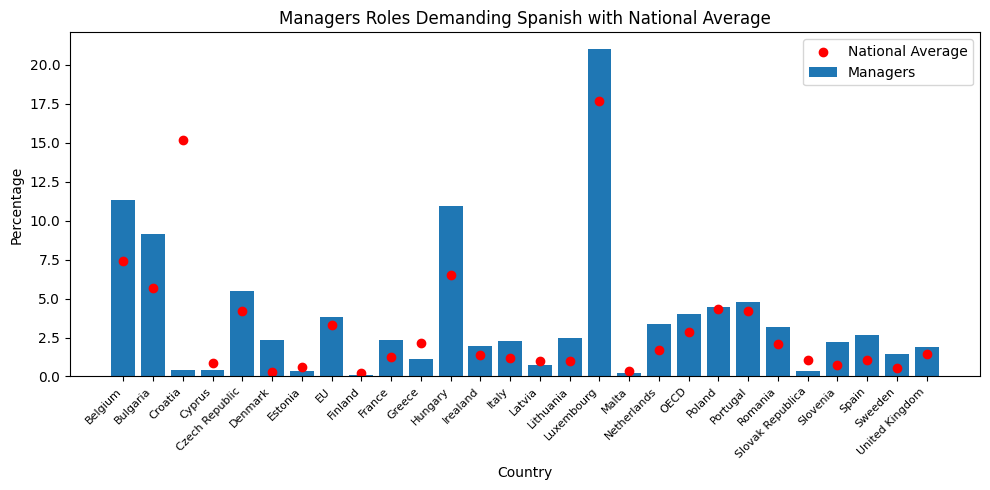

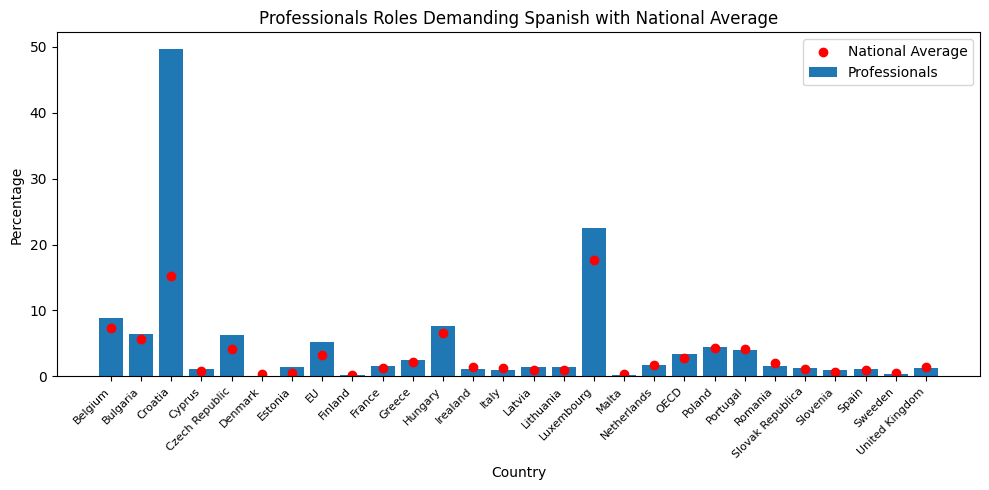

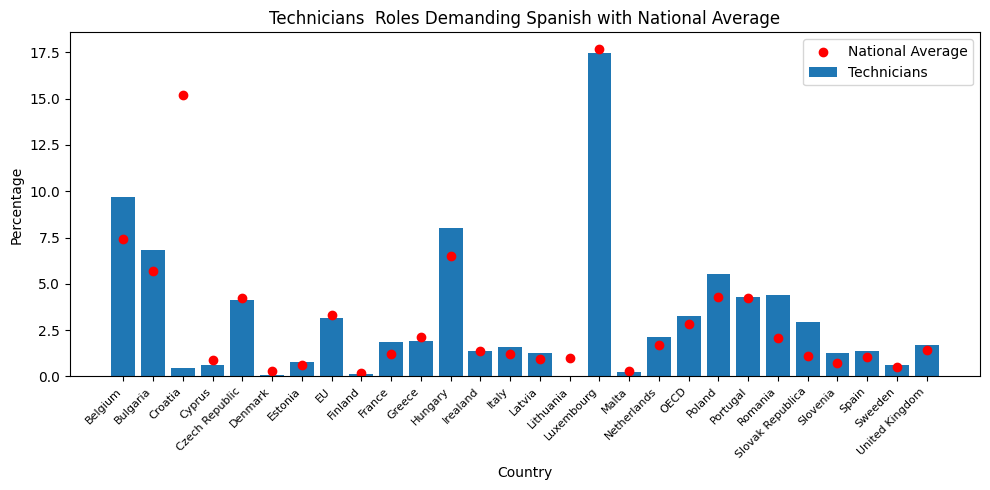

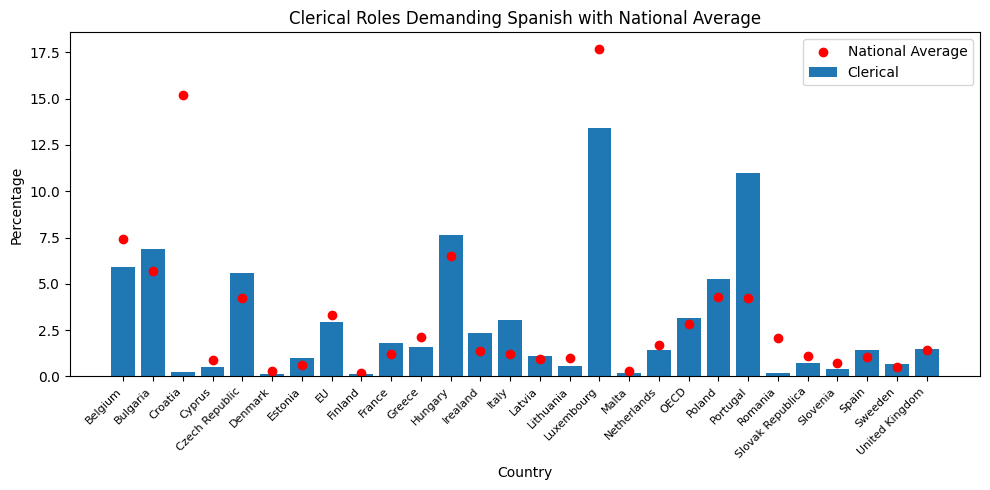

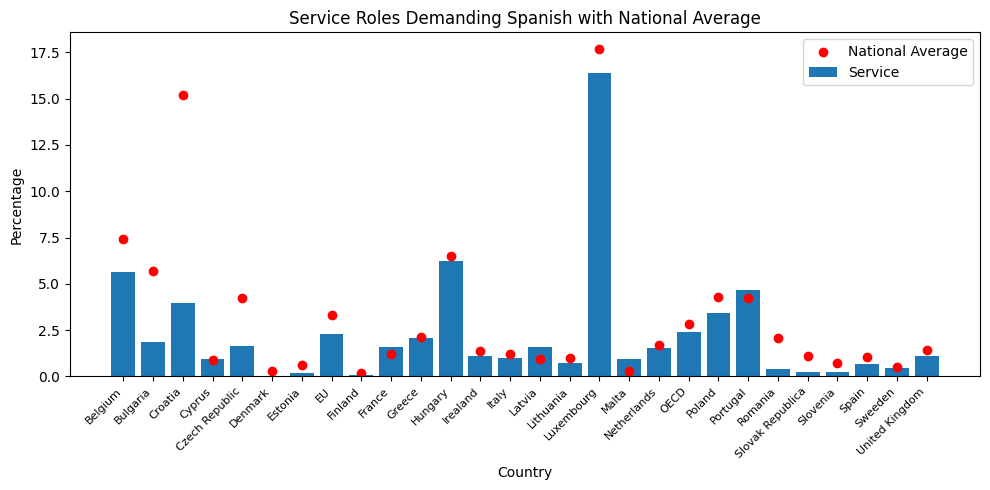

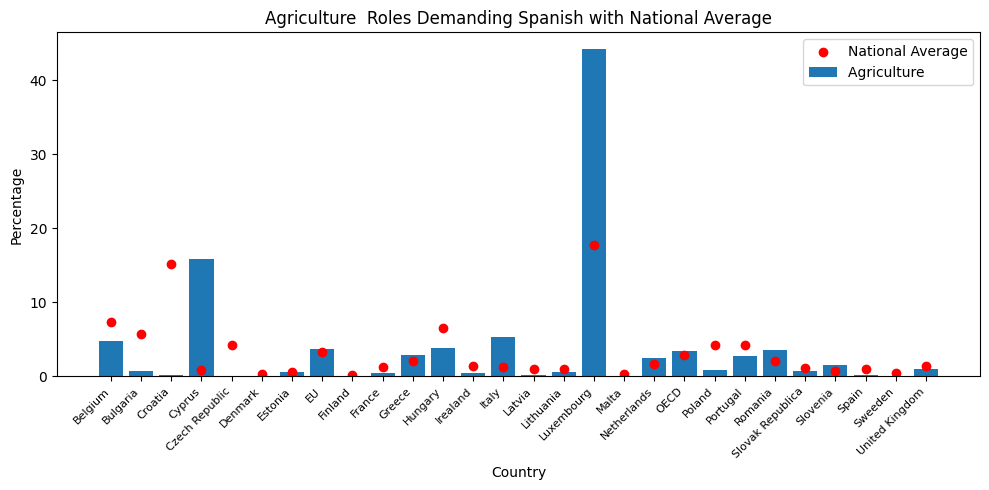

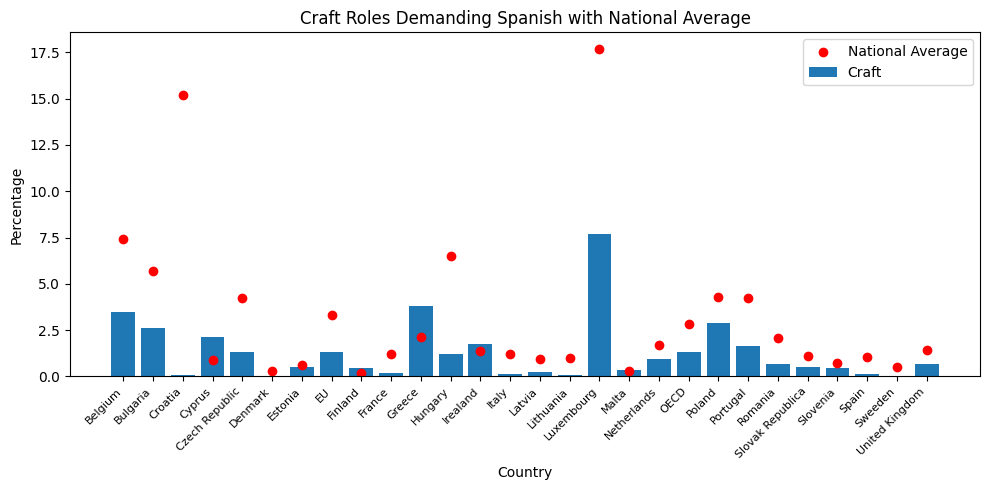

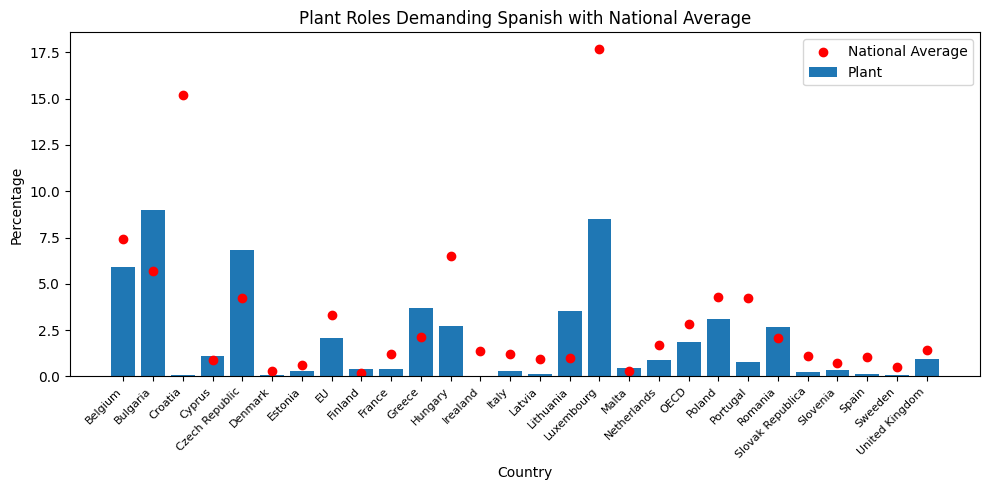

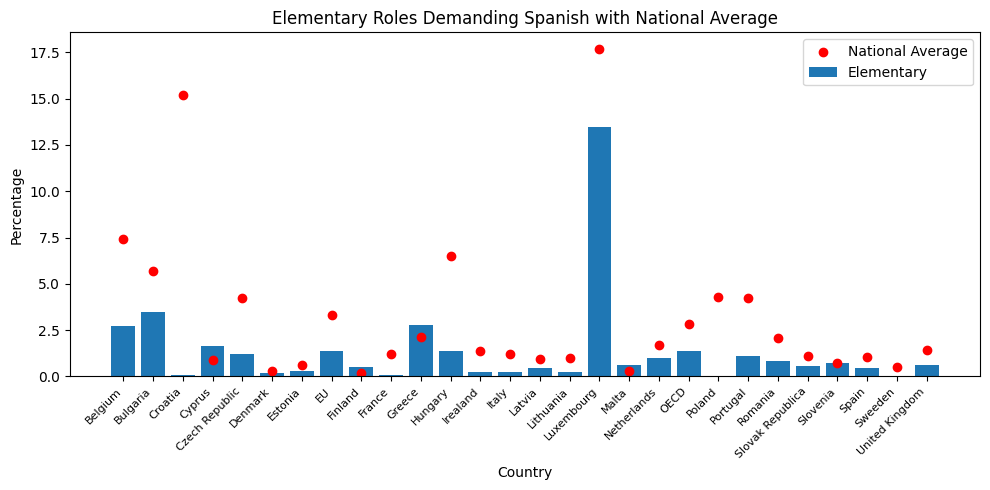

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'clean' is your data
data = clean
dfgerman = pd.DataFrame(data)


dfgerman['National Average'] = pd.to_numeric(dfgerman['National Average'], errors='coerce')

# Plotting
occupation_titles = dfgerman.columns[1:-1]
countries = dfgerman['Country']

for occupation in occupation_titles:
    plt.figure(figsize=(10, 5))
    plt.bar(countries, dfgerman[occupation], label=occupation)
    plt.scatter(countries, dfgerman['National Average'], color='red', marker='o', label='National Average')
    plt.title(f'{occupation} Roles Demanding Spanish with National Average')
    plt.xlabel('Country')
    plt.ylabel('Percentage')

    plt.xticks(rotation=45, ha='right', fontsize=8)

    plt.legend()
    plt.tight_layout()
    plt.show()

In [9]:
print(dfgerman.columns)

Index(['Country', 'Managers', 'Professionals', 'Technicians ', 'Clerical',
       'Service', 'Agriculture ', 'Craft', 'Plant', 'Elementary',
       'National Average '],
      dtype='object')
